In [1]:
#Importamos tensorflow, pandas y Numpy
import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
#Importamos los datos de MNIST
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


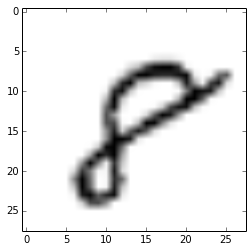

In [6]:
%matplotlib inline

#Vemos un numero como ejemplo
num = mnist.train.images[54999].reshape((28,28))
plt.imshow(num, cmap = cm.Greys)
plt.show()

In [4]:
mnist.train.labels[54999].nonzero()[0][0]

8

In [11]:
#Paremeters
learning_rate = 0.01
epoch = 20
batch_size = 100
display_step = 1

#NN Parameters
n_layer_1 = 200
n_layer_2 = 200
entries = 784
classes = 10

#Inputs
x = tf.placeholder('float', [None, entries], name = 'Entries')
y = tf.placeholder('float', [None, classes], name = 'Classes')


In [8]:
def network(x,weights, bias):
    #Activacion primera capa
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x,weights['L1']),bias['b1']))
    
    #Activacion segunda capa
    layer_2= tf.nn.relu(tf.add(tf.matmul(layer_1,weights['L2']),bias['b2']))
    
    #Salida
    output = tf.matmul(layer_2, weights['out']) + bias['out']
    return output

In [12]:
#Weights and bias
weights = {
    'L1': tf.Variable(tf.random_normal([entries, n_layer_1])),
    'L2': tf.Variable(tf.random_normal([n_layer_1, n_layer_2])),
    'out': tf.Variable(tf.random_normal([n_layer_2, classes]))
}

bias = {
    'b1': tf.Variable(tf.random_normal([n_layer_1])),
    'b2': tf.Variable(tf.random_normal([n_layer_2])),
    'out': tf.Variable(tf.random_normal([classes]))
}
